In [1]:
import pandas as pd

In [3]:
data=pd.read_csv("spam.csv",encoding=" 'latin' ")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.shape


(5572, 5)

In [6]:
data['v2'][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
data['v1'].value_counts()


ham     4825
spam     747
Name: v1, dtype: int64

In [9]:
import seaborn as sns


C:\Users\Wellborn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

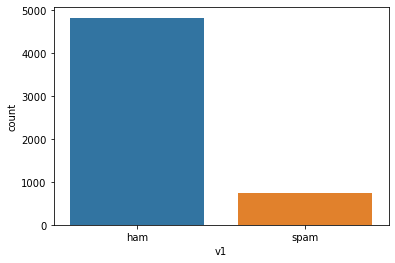

In [11]:
sns.countplot(data['v1'])


In [12]:
data.duplicated().sum()


403

In [13]:
data.drop_duplicates(inplace=True)


In [14]:
data.duplicated().sum()

0

In [15]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [16]:
data.shape


(5169, 5)

In [17]:
5728 - 33


5695

C:\Users\Wellborn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

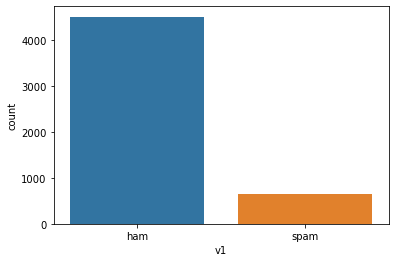

In [18]:
sns.countplot(data['v1'])


data['v1'].value_counts()


### Separate in X and Y


In [21]:
X = data['v2'].values
y = data['v1'].values

In [22]:
y


array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

# Train - Test split


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [27]:
X_train.shape


(4135,)

In [28]:
X_test.shape


(1034,)

In [29]:
y_train.shape


(4135,)

In [30]:
y_test.shape


(1034,)

### Preprocessing

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [33]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
len(x_train.toarray())

4135

In [35]:
len(x_train.toarray()[0])


7594

## Training by ML Algorithm

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [37]:
nb.fit(x_train, y_train)


MultinomialNB()

In [38]:
x_test = cv.transform(X_test)


In [39]:
len(x_test.toarray())


1034

In [40]:
len(x_test.toarray()[0])


7594

In [41]:
y_pred = nb.predict(x_test)


In [42]:
from sklearn.metrics import accuracy_score


In [43]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9816247582205029

In [44]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9929866989117292

## test using some emails

In [45]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']


In [46]:
clean_email = cv.transform(email)


In [47]:
len(clean_email.toarray()[0])


7594

In [48]:
check = nb.predict(clean_email)[0]


In [49]:
check


'ham'

## Evaluation Function

In [50]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!


In [51]:
email = ['u got a new job']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!
